In [8]:
import numpy as np
import pandas as pd
from datetime import datetime, date
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.api as sm

import torch
import pickle

from flask import Flask


In [9]:
sitting = pd.read_csv('SensorTrial-Sitting.csv')
standing = pd.read_csv('SensorTrial-Standing.csv')
exercise = pd.read_csv('SensorTrial-PostExercise.csv')

In [10]:
# Combine data sets

frames = [sitting, standing, exercise]
data = pd.concat(frames)

In [11]:
data

,Time,SPO2 Level,Heart Rate,Respiration Rate
0,9:54:52 AM,0,0,0
1,9:54:52 AM,0,0,0
2,9:54:52 AM,0,0,0
3,9:54:52 AM,0,0,0
4,9:54:52 AM,0,0,0
...,...,...,...,...
11255,4:30:25 PM,97,62,13
11256,4:30:25 PM,97,62,13
11257,4:30:25 PM,97,62,13
11258,4:30:25 PM,0,0,0


In [12]:
# Clean data

data = data.replace(0.0, np.nan)
data = data.dropna()

In [13]:
# View new data

data = data.drop(['Time'], axis = 1)

In [14]:
data

,SPO2 Level,Heart Rate,Respiration Rate
5520,87.0,61.0,11.0
5521,87.0,61.0,11.0
5522,87.0,61.0,11.0
5523,87.0,61.0,11.0
5524,87.0,61.0,11.0
...,...,...,...
11253,97.0,62.0,13.0
11254,97.0,62.0,13.0
11255,97.0,62.0,13.0
11256,97.0,62.0,13.0


<AxesSubplot:xlabel='Heart Rate', ylabel='SPO2 Level'>

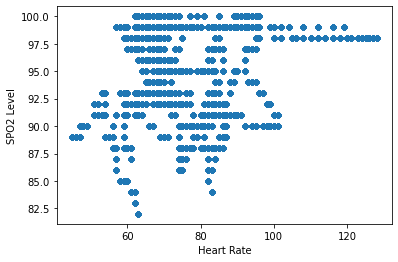

In [15]:
# Plot x against y

data.plot(x = 'Heart Rate', y = 'SPO2 Level', kind = 'scatter')

<AxesSubplot:xlabel='Heart Rate', ylabel='SPO2 Level'>

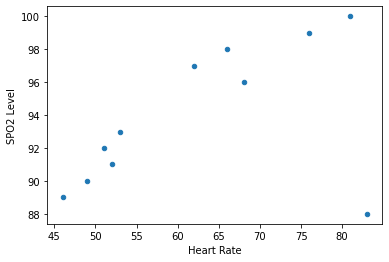

In [16]:
# Drop Duplicates

data = data.drop_duplicates(subset=['Heart Rate'], keep='last')
data = data.drop_duplicates(subset=['SPO2 Level'], keep='last')

data.plot(x = 'Heart Rate', y = 'SPO2 Level', kind = 'scatter')

In [17]:
data

,SPO2 Level,Heart Rate,Respiration Rate
21631,88.0,83.0,24.0
28011,89.0,46.0,10.0
28171,90.0,49.0,9.0
28691,93.0,53.0,10.0
28771,92.0,51.0,10.0
28851,91.0,52.0,10.0
4927,100.0,81.0,21.0
8847,99.0,76.0,9.0
9407,96.0,68.0,10.0
10407,98.0,66.0,13.0


In [18]:
# Drop outlier
data = data.drop([21631], axis = 0)

In [19]:
np.mean(data[['SPO2 Level']])

/Users/rohinimadhu/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


SPO2 Level    94.5
dtype: float64

<AxesSubplot:xlabel='Heart Rate', ylabel='SPO2 Level'>

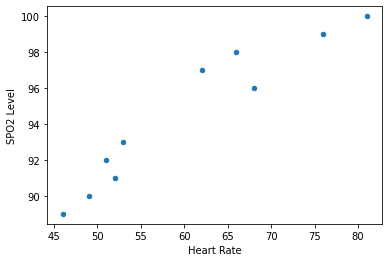

In [20]:
data.plot(x = 'Heart Rate', y = 'SPO2 Level', kind = 'scatter')

<AxesSubplot:>

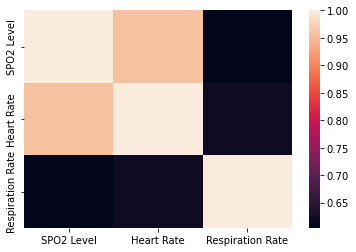

In [21]:
# Correlation plot
corr = data.corr()
sns.heatmap(corr)

In [22]:
# T test for linearity

response = ['SPO2 Level']
predictor = ['Heart Rate']
x = data[predictor].values
y = data[response].values

x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     84.42
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           1.59e-05
Time:                        10:30:08   Log-Likelihood:                -15.238
No. Observations:                  10   AIC:                             34.48
Df Residuals:                       8   BIC:                             35.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.4637      2.109     35.787      0.0

/Users/rohinimadhu/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [23]:
# Linear model


model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

print('Root Mean Squared Error', np.sqrt(mean_squared_error(y, y_pred)))

Root Mean Squared Error 1.1106035165351182


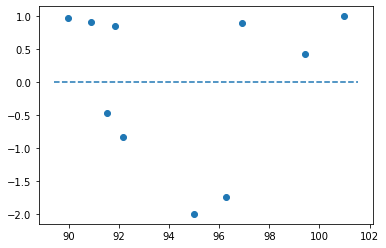

In [24]:
# Residuals vs fitted plot

def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

residuals = y_pred - y


plt.scatter(y_pred, residuals)
abline(0, 0)

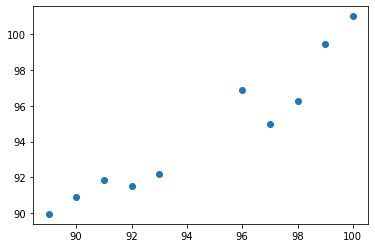

In [25]:
plt.scatter(y, y_pred)

In [27]:
# Save Model
file_name = "SPO2Model.pkl"
with open(file_name, 'wb') as file:
    pickle.dump(model, file)

In [ ]:
ex = model.predict(90)
ex